In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [163]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [164]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [165]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [166]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [167]:
# Looking for missing values
print(df_train.isnull().sum())
print('-------')
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [168]:
# Dropping PassengerId, Cabin due to missing values and Ticket columns
df_train = df_train.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1)
df_test = df_test.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1)
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [169]:
# Finding the rows where Embarked is null
df_train.query('Embarked != Embarked')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [170]:
# Changing these values to 'S' as these are known values. The mode could also be used here to sub for the null values
df_train.loc[61, 'Embarked'] = 'S'
df_train.loc[829, 'Embarked'] = 'S'
df_train.query('index == 61 or index == 829')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,S
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,S


In [171]:
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


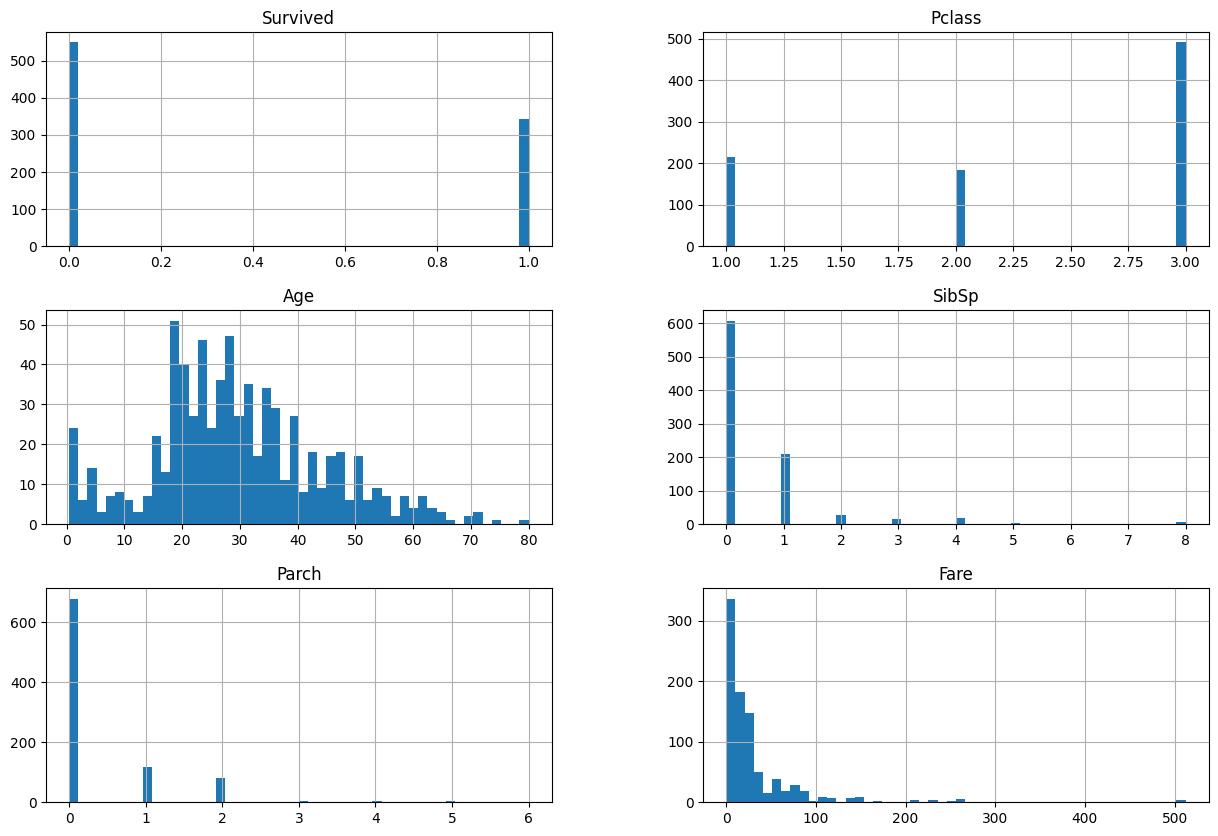

In [172]:
# Overview of distribution of the data
df_train.hist(bins=50, figsize=(15, 10))
plt.show()

Text(0.5, 1.0, 'Age vs Survival')

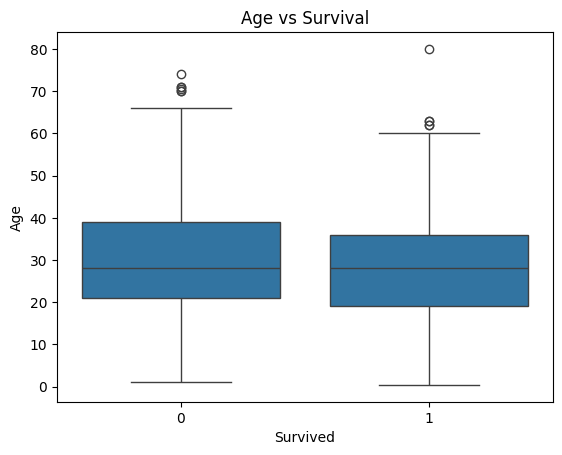

In [173]:
# Booxplot of age and survival
sns.boxplot(data=df_train, y="Age", x="Survived")
plt.title("Age vs Survival")

In [174]:
# Filling NaN values with median for Age and Fare.
median_train = df_train['Age'].median()
median_test = df_test['Age'].median()
median_fare = df_test['Fare'].median()
df_train['Age'] = df_train['Age'].fillna(median_train)
df_test['Age'] = df_test['Age'].fillna(median_test)
df_test['Fare'] = df_test['Fare'].fillna(median_fare)

print(df_train.isna().sum())
print(df_test.isna().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


Survival rate males: 18.89
Survival rate females: 74.2


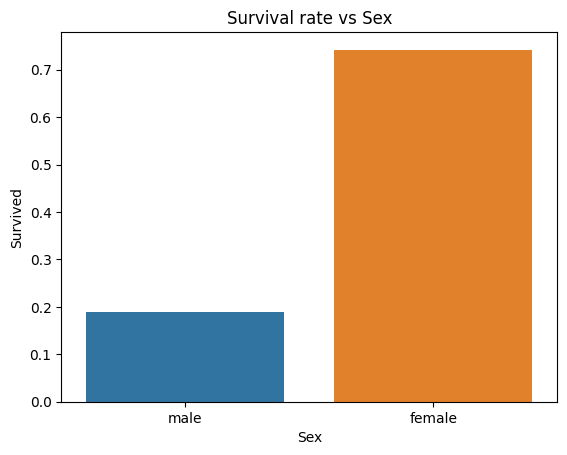

In [175]:
#Visualization of Survival rate and sex.
sns.barplot(data=df_train, y="Survived", x="Sex", hue="Sex", errorbar=None)
plt.title("Survival rate vs Sex")
males_total = df_train["Survived"][df_train["Sex"] == "male"].value_counts()
print(f"Survival rate males: {round(df_train["Survived"][df_train["Sex"] == "male"].value_counts(normalize = True)[1]*100, 2)}")
print(f"Survival rate females: {round(df_train["Survived"][df_train["Sex"] == "female"].value_counts(normalize = True)[1]*100, 2)}")


Text(0.5, 1.0, 'Survival rate vs Embarked location')

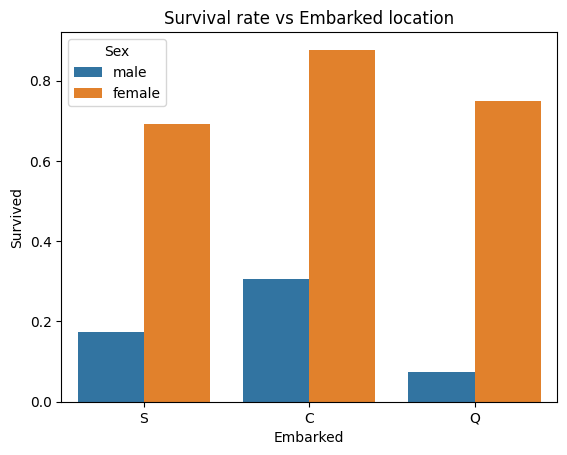

In [176]:
# Checking how location of embarking affected survival 
sns.barplot(data=df_train, y="Survived", x="Embarked", hue="Sex", errorbar=None)
plt.title("Survival rate vs Embarked location")


Text(0.5, 1.0, 'Survival vs No. siblings/spouses')

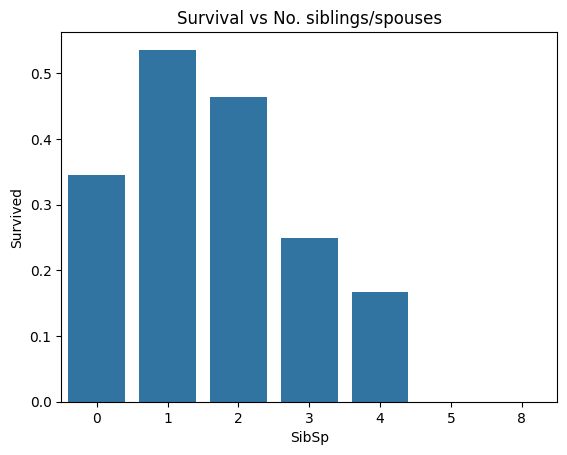

In [177]:
# Checking relationship between number of siblings/spouses and survival
sns.barplot(data=df_train, y="Survived", x="SibSp", errorbar=None)
plt.title("Survival vs No. siblings/spouses")

Survival rate of class 1: 62.96
Survival rate of class 2: 47.28
Survival rate of class 3: 24.24


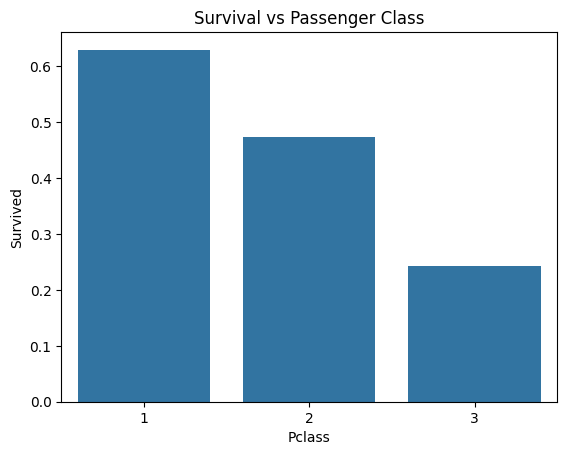

In [178]:
# Survival and passenger class - how wealth affected survival rate
sns.barplot(data=df_train, y="Survived", x="Pclass", errorbar=None)
plt.title("Survival vs Passenger Class")
print(f"Survival rate of class 1: {round(df_train["Survived"][df_train["Pclass"] == 1].value_counts(normalize = True)[1]*100, 2)}")
print(f"Survival rate of class 2: {round(df_train["Survived"][df_train["Pclass"] == 2].value_counts(normalize = True)[1]*100, 2)}")
print(f"Survival rate of class 3: {round(df_train["Survived"][df_train["Pclass"] == 3].value_counts(normalize = True)[1]*100, 2)}")

Survival rate of class 1: 96.81
Survival rate of class 1: 36.89
Survival rate of class 2: 92.11
Survival rate of class 1: 36.89
Survival rate of class 3: 50.0
Survival rate of class 1: 36.89


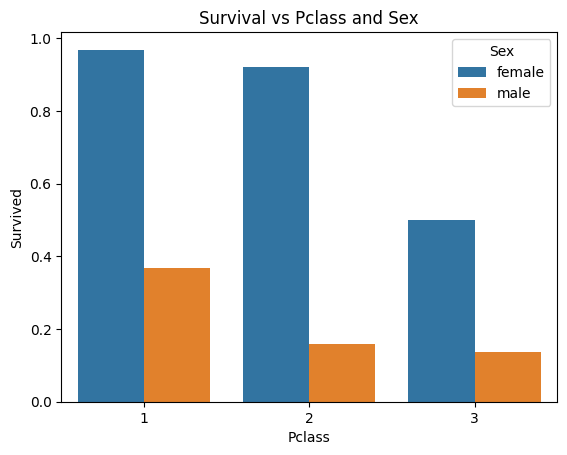

In [179]:
# How class and sex affected survival rate  
sns.barplot(data=df_train, y="Survived", x="Pclass", hue="Sex", errorbar=None)
plt.title("Survival vs Pclass and Sex")
print(f"Survival rate of class 1: {round(df_train["Survived"][df_train["Pclass"] == 1][df_train['Sex'] == 'female'].value_counts(normalize = True)[1]*100, 2)}")
print(f"Survival rate of class 1: {round(df_train["Survived"][df_train["Pclass"] == 1][df_train['Sex'] == 'male'].value_counts(normalize = True)[1]*100, 2)}")
print(f"Survival rate of class 2: {round(df_train["Survived"][df_train["Pclass"] == 2][df_train['Sex'] == 'female'].value_counts(normalize = True)[1]*100, 2)}")
print(f"Survival rate of class 1: {round(df_train["Survived"][df_train["Pclass"] == 1][df_train['Sex'] == 'male'].value_counts(normalize = True)[1]*100, 2)}")
print(f"Survival rate of class 3: {round(df_train["Survived"][df_train["Pclass"] == 3][df_train['Sex'] == 'female'].value_counts(normalize = True)[1]*100, 2)}")
print(f"Survival rate of class 1: {round(df_train["Survived"][df_train["Pclass"] == 1][df_train['Sex'] == 'male'].value_counts(normalize = True)[1]*100, 2)}")

Text(0.5, 1.0, 'Fare vs Survival')

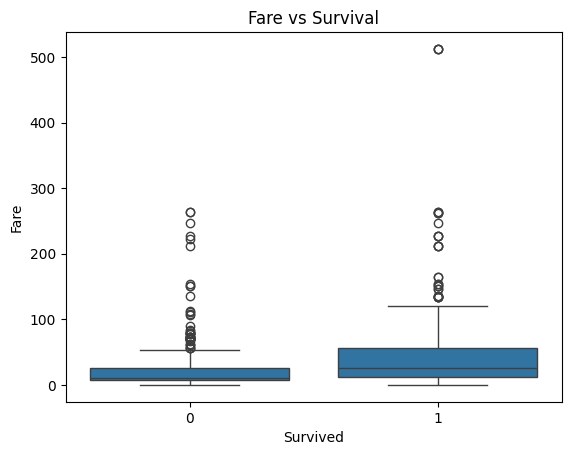

In [180]:
# Simple box plot of fare and survival
sns.boxplot(data=df_train, x="Survived", y ="Fare")
plt.title("Fare vs Survival")

In [181]:
# Dropping names column
df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
df_train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [182]:
# One hot encoding the categorical feartures for class, sex and embarking
ohe = OneHotEncoder()
df_encoded = df_train.copy()

categorical_columns = ['Pclass', 'Sex', 'Embarked']


# Fit and transform all categorical columns together
encoded_features_train = ohe.fit_transform(df_train[categorical_columns])
encoded_features_test = ohe.fit_transform(df_test[categorical_columns])

# Convert the encoded features into a dataFrame
encoded_df_train = pd.DataFrame(encoded_features_train.toarray(), columns=ohe.get_feature_names_out(categorical_columns))
encoded_df_test = pd.DataFrame(encoded_features_test.toarray(), columns=ohe.get_feature_names_out(categorical_columns))

# Concatenate the encoded dataFrame with the original dataFrame
df_encoded_train = pd.concat([df_train.drop(columns=categorical_columns), encoded_df_train], axis=1)
df_encoded_test = pd.concat([df_test.drop(columns=categorical_columns), encoded_df_test], axis=1)

df_encoded_train



,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,1,19.0,0,0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0,28.0,1,2,23.4500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,1,26.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [183]:
# scaling numerical features
scaler = StandardScaler()
df_encoded_train[['Age', 'Fare']] = scaler.fit_transform(df_encoded_train[['Age', 'Fare']])
df_encoded_train

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,-0.565736,1,0,-0.502445,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,0.663861,1,0,0.786845,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,-0.258337,0,0,-0.488854,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,0.433312,1,0,0.420730,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,0.433312,0,0,-0.486337,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.181487,0,0,-0.386671,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,1,-0.796286,0,0,-0.044381,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0,-0.104637,1,2,-0.176263,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,1,-0.258337,0,0,-0.044381,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


<Axes: >

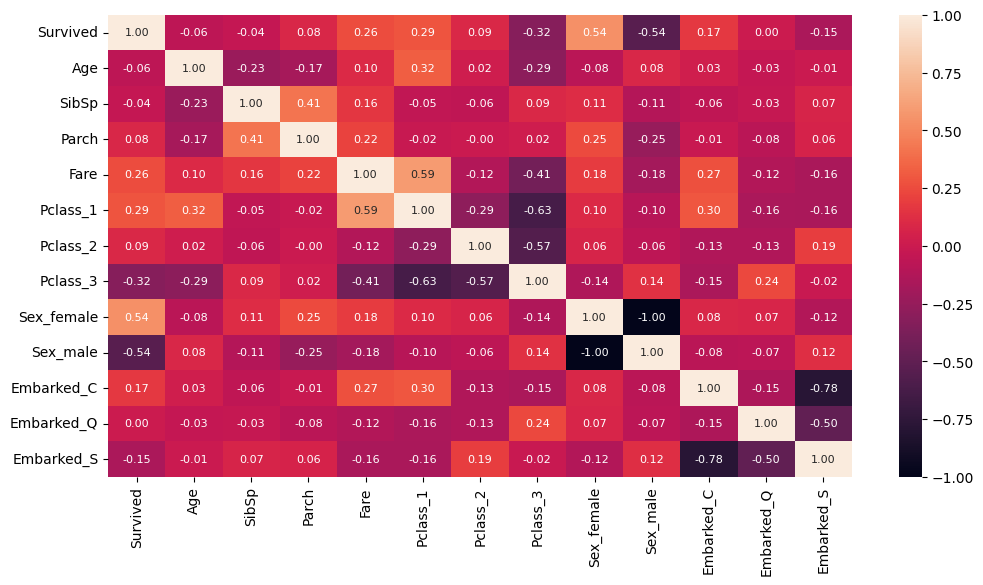

In [184]:
# Simple heatmap to see correlation between columns
plt.figure(figsize=(12, 6))
sns.heatmap(df_encoded_train.corr(), annot=True, fmt=".2f", annot_kws={'size':  8})

In [185]:
# Splitting train and test data with a 20 to 80 split
X = df_encoded_train.drop(['Survived'], axis=1)
Y = df_encoded_train["Survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [186]:
# Logistic regression
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, Y_train)
Y_pred1 = log_reg.predict(X_test)
acc_log_reg = round(accuracy_score(Y_pred1, Y_test)*100, 2)
print(acc_log_reg)

79.89


In [187]:
# Gaussian Na Bayes
gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)
Y_pred2 = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(Y_pred2, Y_test) * 100, 2)
print(acc_gaussian)

77.09


In [188]:
# SVC 
svc = SVC()

svc.fit(X_train, Y_train)
Y_pred3 = svc.predict(X_test)
acc_svc = round(accuracy_score(Y_pred3, Y_test)*100, 2)
print(acc_svc)

81.56


In [189]:
# K nearest neighbours
knn = KNeighborsClassifier()

knn.fit(X_train, Y_train)
y_pred4 = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred4, Y_test)*100, 2)
print(acc_knn)

81.01


In [190]:
# Random forest
randomforest = RandomForestClassifier()

randomforest.fit(X_train, Y_train)
y_pred5 = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred5, Y_test)*100, 2)
print(acc_randomforest)

81.56


In [191]:
# Putting model results in dataframe
models = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'SVC', 'KNN', 'Random Forest'],'Score': [acc_log_reg, acc_gaussian, acc_svc, acc_knn, acc_randomforest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,SVC,81.56
4,Random Forest,81.56
3,KNN,81.01
0,Logistic Regression,79.89
1,Naive Bayes,77.09


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Naive Bayes'),
  Text(2, 0, 'SVC'),
  Text(3, 0, 'KNN'),
  Text(4, 0, 'Random Forest')])

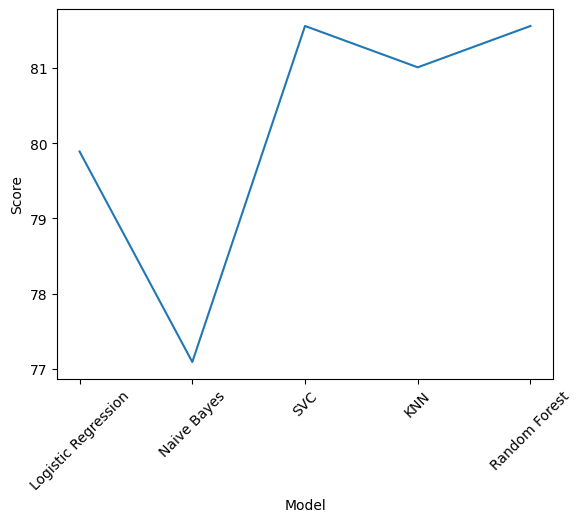

In [192]:
# Plotting model results
sns.lineplot(data=models, y='Score', x='Model')
plt.xticks(rotation=45)